In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('./geyser_data.csv')
dataset

,eruption,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


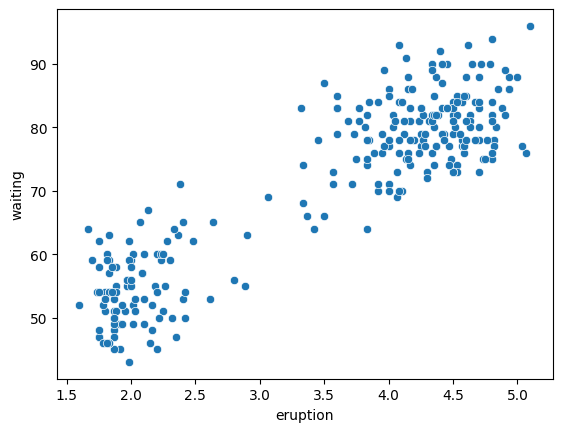

In [8]:
# Treat each data entry as a 2 dimensional feature vector. Parse and plot all data points on 2-D plane
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='eruption', y='waiting', data=dataset)
plt.show()

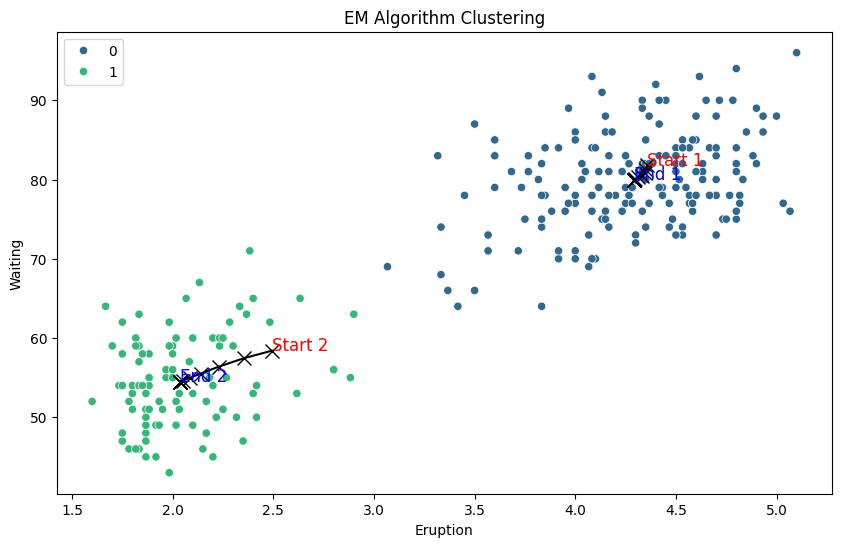

In [15]:
import numpy as np

# Extract the features from the dataset
X = dataset[['eruption', 'waiting']].values

# Initialize parameters
np.random.seed(0)
k = 2  # number of clusters
n, d = X.shape

# Randomly initialize the means
means = X[np.random.choice(n, k, False)]

# Initialize the covariance matrices to identity matrices
covariances = np.array([np.eye(d)] * k)

# Initialize the mixing coefficients to be equal
weights = np.ones(k) / k

# Initialize the responsibilities to zeros
responsibilities = np.zeros((n, k))

def gaussian(x, mean, cov):
    """Calculate the Gaussian probability density function."""
    d = x.shape[0]
    cov_inv = np.linalg.inv(cov)
    diff = x - mean
    return np.exp(-0.5 * diff.T @ cov_inv @ diff) / np.sqrt((2 * np.pi) ** d * np.linalg.det(cov))

# List to store changes in means
means_history = []

# EM algorithm
max_iter = 100
for iteration in range(max_iter):
    # E-step: calculate responsibilities
    for i in range(n):
        for j in range(k):
            responsibilities[i, j] = weights[j] * gaussian(X[i], means[j], covariances[j])
        responsibilities[i, :] /= np.sum(responsibilities[i, :])

    # M-step: update parameters
    for j in range(k):
        responsibility = responsibilities[:, j]
        total_responsibility = np.sum(responsibility)
        means[j] = np.sum(responsibility[:, np.newaxis] * X, axis=0) / total_responsibility
        diff = X - means[j]
        covariances[j] = (responsibility[:, np.newaxis, np.newaxis] * np.einsum('ij,ik->ijk', diff, diff)).sum(axis=0) / total_responsibility
        weights[j] = total_responsibility / n

    # Store the means for visualization
    means_history.append(means.copy())

# Assign clusters based on the highest responsibility
clusters = np.argmax(responsibilities, axis=1)

# Change means_history to numpy array
means_history = np.array(means_history)

# Plot the clustered data and change in means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis')
plt.xlabel('Eruption')
plt.ylabel('Waiting')
plt.title('EM Algorithm Clustering')

# Overlay the change in means
for i in range(k):
    plt.plot(means_history[:, i, 0], means_history[:, i, 1], marker='x', color='k', markersize=10)
    plt.text(means_history[0, i, 0], means_history[0, i, 1], f'Start {i+1}', fontsize=12, color='red')
    plt.text(means_history[-1, i, 0], means_history[-1, i, 1], f'End {i+1}', fontsize=12, color='blue')
plt.show()